In [1]:
#analysis -> feature eng -> model -> web app



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv("E:/credit-risk-model/data/german_credit_data.csv")


In [6]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [8]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [9]:
df.shape

(1000, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df["Job"].unique()

array([2, 1, 3, 0])

In [13]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:

from sklearn.impute import SimpleImputer


In [16]:
num_cols = ["Age", "Job", "Credit amount", "Duration"]
cat_cols = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]

In [17]:
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

In [18]:
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [19]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67.0,male,2.0,own,little,little,1169.0,6.0,radio/TV,good
1,1,22.0,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,2,49.0,male,1.0,own,little,little,2096.0,12.0,education,good
3,3,45.0,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,4,53.0,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31.0,female,1.0,own,little,little,1736.0,12.0,furniture/equipment,good
996,996,40.0,male,3.0,own,little,little,3857.0,30.0,car,good
997,997,38.0,male,2.0,own,little,little,804.0,12.0,radio/TV,good
998,998,23.0,male,2.0,free,little,little,1845.0,45.0,radio/TV,bad


In [20]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [21]:
df.drop(columns='Unnamed: 0', inplace=True)

In [22]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [23]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67.0,male,2.0,own,little,little,1169.0,6.0,radio/TV,good
1,22.0,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,49.0,male,1.0,own,little,little,2096.0,12.0,education,good
3,45.0,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,53.0,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31.0,female,1.0,own,little,little,1736.0,12.0,furniture/equipment,good
996,40.0,male,3.0,own,little,little,3857.0,30.0,car,good
997,38.0,male,2.0,own,little,little,804.0,12.0,radio/TV,good
998,23.0,male,2.0,free,little,little,1845.0,45.0,radio/TV,bad


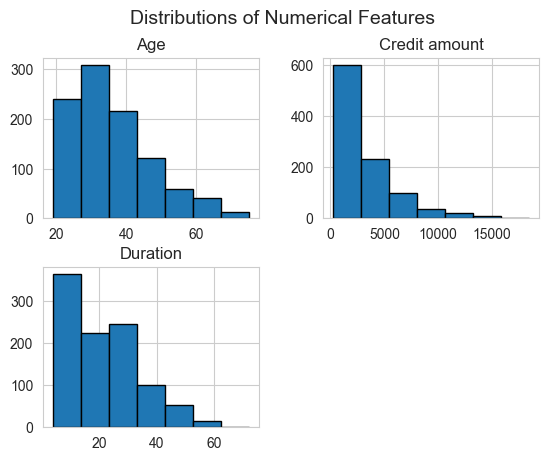

In [24]:
df[["Age", "Credit amount","Duration"]].hist(bins=7, edgecolor="black")
plt.suptitle("Distributions of Numerical Features", fontsize=14)
plt.show()

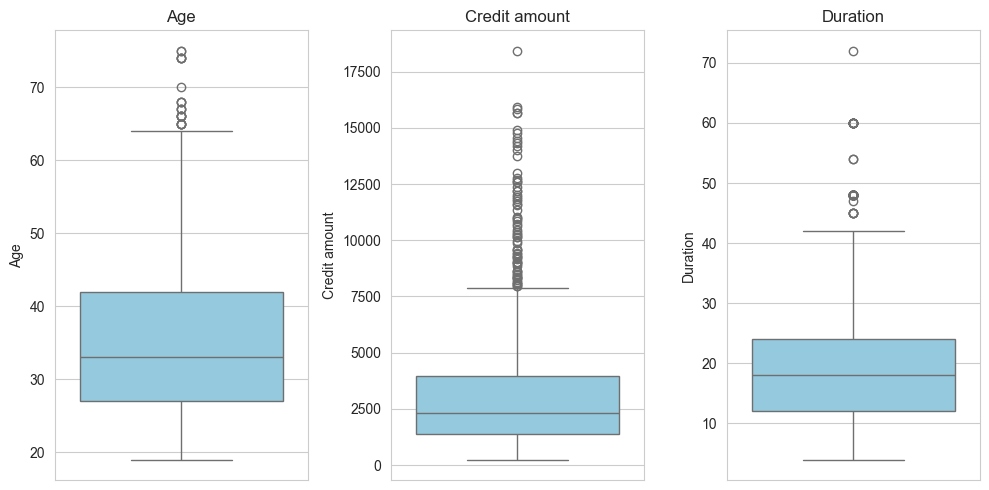

In [25]:
plt.figure(figsize=(10,5))
for i, col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

In [26]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,63.0,male,2.0,own,little,little,6836.0,60.0,business,bad
134,21.0,female,2.0,own,moderate,little,10144.0,60.0,radio/TV,good
255,27.0,male,1.0,own,little,moderate,7418.0,60.0,radio/TV,good
332,24.0,female,3.0,own,moderate,moderate,7408.0,60.0,car,bad
373,63.0,male,3.0,free,little,little,13756.0,60.0,car,good
374,60.0,female,3.0,free,moderate,moderate,14782.0,60.0,vacation/others,bad
616,27.0,male,3.0,free,little,moderate,9157.0,60.0,radio/TV,good
637,21.0,male,2.0,own,little,little,15653.0,60.0,radio/TV,good
672,42.0,male,3.0,own,little,little,10366.0,60.0,car,good
677,24.0,male,2.0,own,moderate,moderate,5595.0,72.0,radio/TV,bad


In [27]:
categorical_cols = ["Sex","Job","Housing","Saving accounts","Checking account","Purpose"]

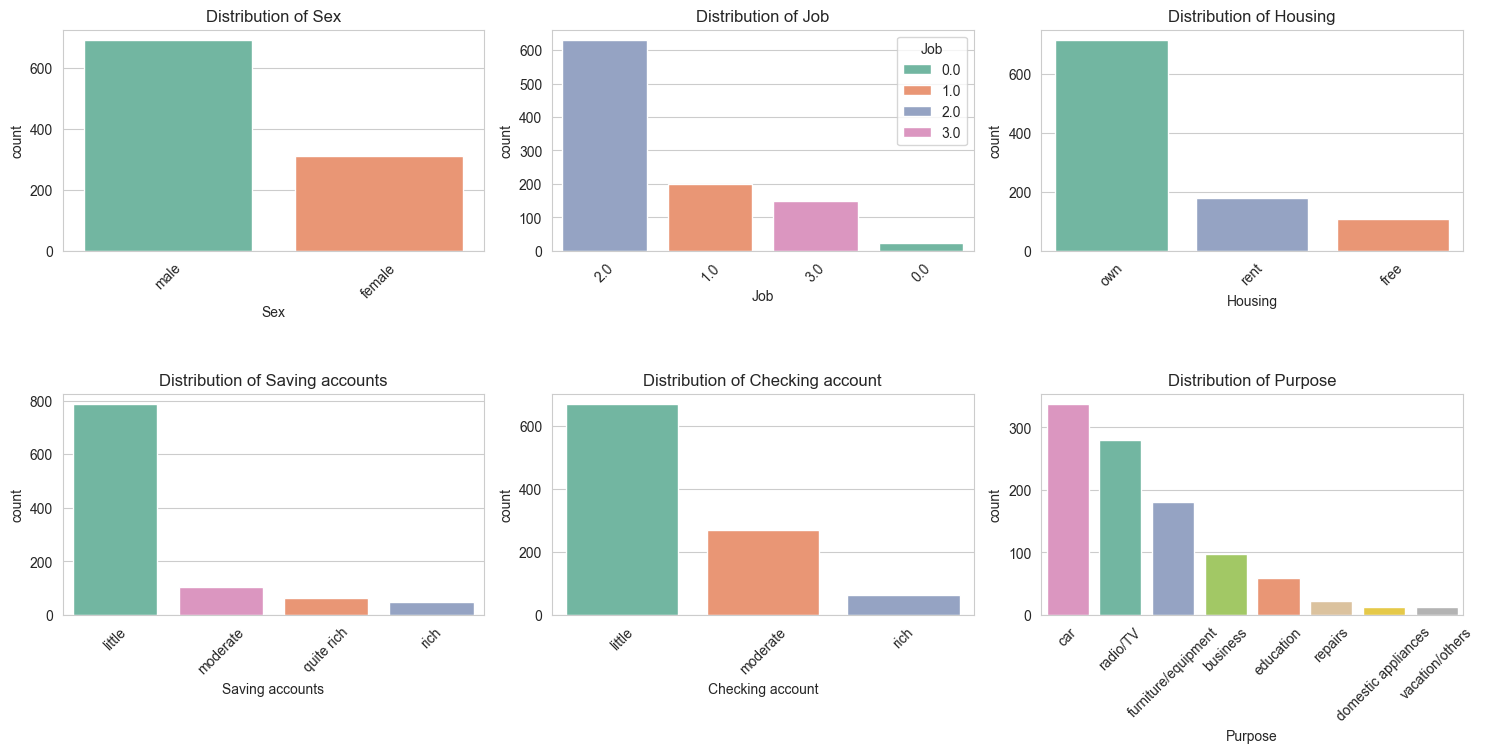

In [28]:
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols):
   plt.subplot(3,3,i+1)
   sns.countplot(data=df, x=col, hue=col, palette="Set2", order=df[col].value_counts().index)
   plt.title(f"Distribution of {col}")
   
   plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
corr=df[["Age","Job","Credit amount","Duration"]].corr()

In [30]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


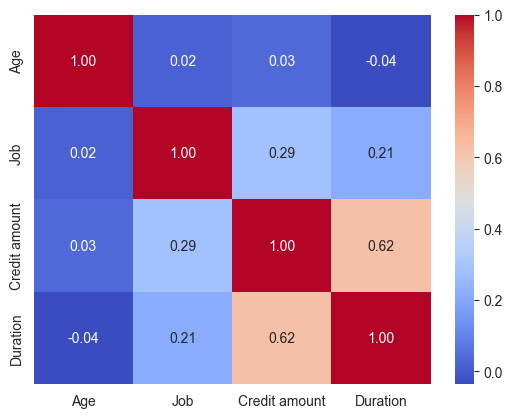

In [31]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [32]:
df.groupby("Job")["Credit amount"].mean()

Job
0.0    2745.136364
1.0    2358.520000
2.0    3070.965079
3.0    5435.493243
Name: Credit amount, dtype: float64

In [33]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

In [34]:
pd.pivot_table(df, index="Housing", columns="Purpose", values="Credit amount")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


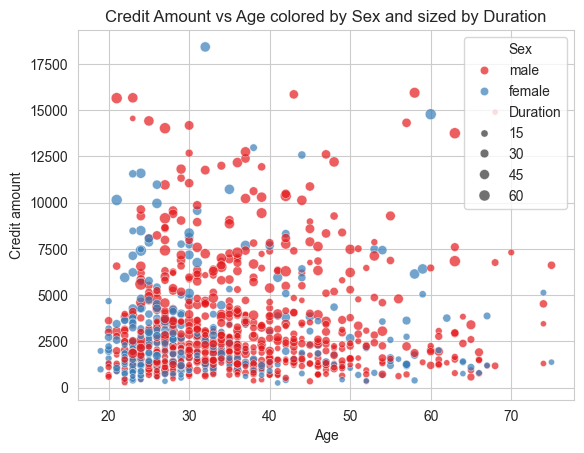

In [35]:
sns.scatterplot(data=df, x="Age", y="Credit amount", hue="Sex", size="Duration",alpha=0.7, palette="Set1")
plt.title("Credit Amount vs Age colored by Sex and sized by Duration")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1688\3764063286.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Saving accounts", y="Credit amount",  palette="Pastel1")


Text(0.5, 1.0, 'Credit Amount Distribution by Saving Accounts')

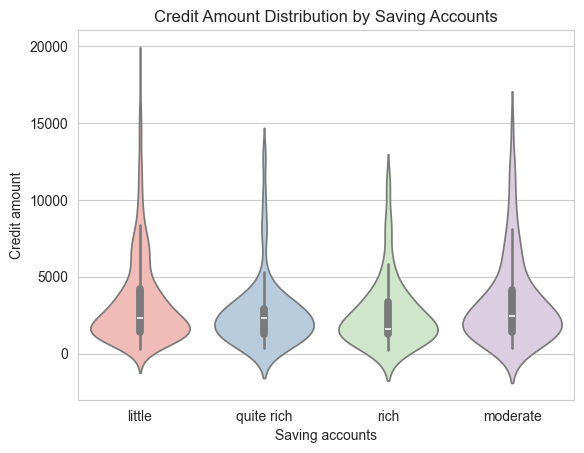

In [36]:
sns.violinplot(data=df, x="Saving accounts", y="Credit amount",  palette="Pastel1")

plt.title("Credit Amount Distribution by Saving Accounts")

In [37]:
df["Risk"].value_counts(normalize=True) * 100

Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_1688\3333774759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x="Risk", y = col, palette="Pastel2")
C:\Users\USER\AppData\Local\Temp\ipykernel_1688\3333774759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x="Risk", y = col, palette="Pastel2")
C:\Users\USER\AppData\Local\Temp\ipykernel_1688\3333774759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x="Risk", y = col, palette="Pastel2")


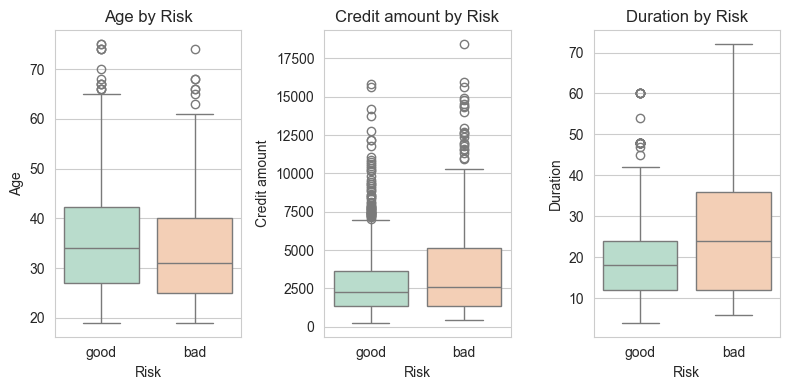

In [38]:
plt.figure(figsize=(8,4))
for i, col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data = df, x="Risk", y = col, palette="Pastel2")
    plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()


In [39]:
df.groupby("Risk")[["Age","Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


In [40]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

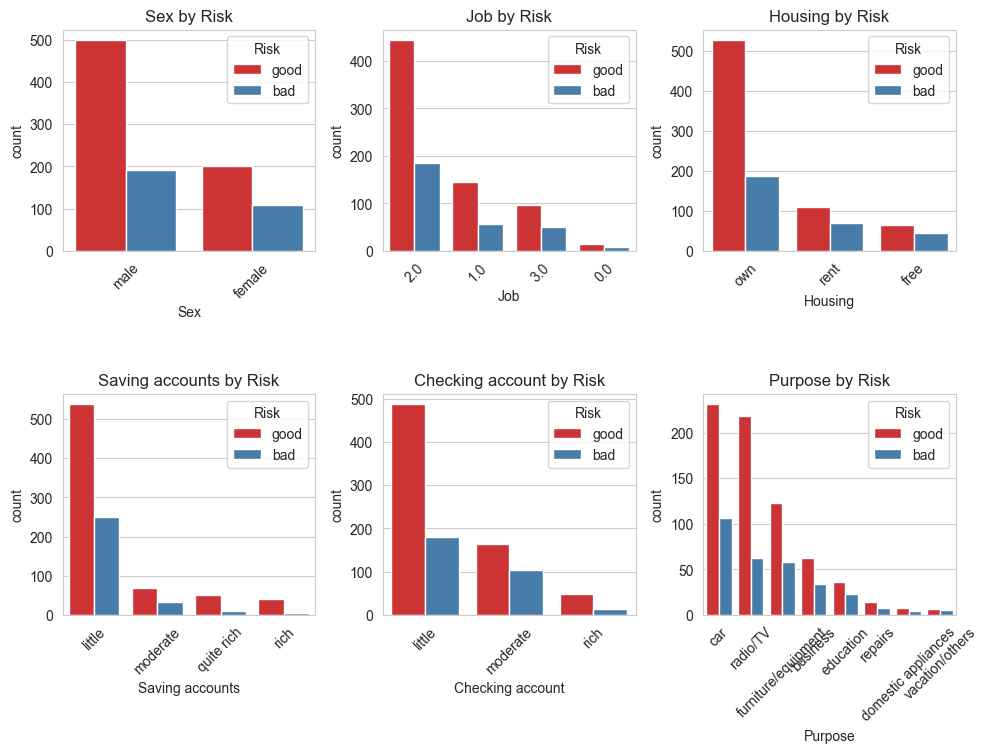

In [41]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue="Risk", palette="Set1", order=df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [42]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [43]:
features=["Age","Sex","Job","Housing","Saving accounts","Checking account","Credit amount","Duration"]

In [44]:
target ="Risk"

In [45]:
df_model = df[features + [target]].copy()

In [46]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67.0,male,2.0,own,little,little,1169.0,6.0,good
1,22.0,female,2.0,own,little,moderate,5951.0,48.0,bad
2,49.0,male,1.0,own,little,little,2096.0,12.0,good
3,45.0,male,2.0,free,little,little,7882.0,42.0,good
4,53.0,male,2.0,free,little,little,4870.0,24.0,bad


In [47]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [48]:
df_model = pd.get_dummies(
    df_model,
    columns=["Sex", "Housing", "Saving accounts", "Checking account"],
    drop_first=True
)



In [49]:
le_dict ={}

In [50]:
cat_cols

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [51]:
le_target = LabelEncoder()

In [52]:
target

'Risk'

In [53]:
df_model[target] = le_target.fit_transform(df_model[target])

In [54]:
df_model[target].value_counts()

Risk
1    700
0    300
Name: count, dtype: int64

In [55]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [56]:
df_model.head()

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich
0,67.0,2.0,1169.0,6.0,1,True,True,False,False,False,False,False,False
1,22.0,2.0,5951.0,48.0,0,False,True,False,False,False,False,True,False
2,49.0,1.0,2096.0,12.0,1,True,True,False,False,False,False,False,False
3,45.0,2.0,7882.0,42.0,1,True,False,False,False,False,False,False,False
4,53.0,2.0,4870.0,24.0,0,True,False,False,False,False,False,False,False


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = df_model.drop(target, axis=1)

In [59]:
joblib.dump(X.columns.tolist(), "model_columns.pkl")


['model_columns.pkl']

In [60]:
X

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich
0,67.0,2.0,1169.0,6.0,True,True,False,False,False,False,False,False
1,22.0,2.0,5951.0,48.0,False,True,False,False,False,False,True,False
2,49.0,1.0,2096.0,12.0,True,True,False,False,False,False,False,False
3,45.0,2.0,7882.0,42.0,True,False,False,False,False,False,False,False
4,53.0,2.0,4870.0,24.0,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.0,1.0,1736.0,12.0,False,True,False,False,False,False,False,False
996,40.0,3.0,3857.0,30.0,True,True,False,False,False,False,False,False
997,38.0,2.0,804.0,12.0,True,True,False,False,False,False,False,False
998,23.0,2.0,1845.0,45.0,True,False,False,False,False,False,False,False


In [61]:
# define target vector for modeling
y = df_model[target]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [63]:
X_train.shape

(800, 12)

In [64]:
X_test.shape

(200, 12)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [66]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring="accuracy")
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print("ROC-AUC:", roc_auc)

    return best_model, acc, grid.best_params_





In [67]:
dt = DecisionTreeClassifier(random_state=1, class_weight="balanced")
dt_param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]

}


In [68]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

Accuracy: 0.64
Confusion Matrix:
 [[ 20  40]
 [ 32 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.33      0.36        60
           1       0.73      0.77      0.75       140

    accuracy                           0.64       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.63      0.64      0.63       200

ROC-AUC: 0.6076785714285714


In [69]:
print("Decision Tree Accuaracy:", acc_dt)

Decision Tree Accuaracy: 0.64


In [70]:
print("Best parameterts", params_dt)

Best parameterts {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [71]:
rf = RandomForestClassifier(random_state=1, class_weight="balanced", n_jobs=-1)

In [72]:
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [73]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

Accuracy: 0.735
Confusion Matrix:
 [[ 20  40]
 [ 13 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.33      0.43        60
           1       0.76      0.91      0.83       140

    accuracy                           0.73       200
   macro avg       0.68      0.62      0.63       200
weighted avg       0.71      0.73      0.71       200

ROC-AUC: 0.6876190476190476


In [74]:
print("Random Forest Accuaracy:", acc_rf)

Random Forest Accuaracy: 0.735


In [75]:
print("Best params", params_rf)

Best params {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [76]:
et = ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs=-1)


In [77]:
et_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [78]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

Accuracy: 0.675
Confusion Matrix:
 [[ 17  43]
 [ 22 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.28      0.34        60
           1       0.73      0.84      0.78       140

    accuracy                           0.68       200
   macro avg       0.58      0.56      0.56       200
weighted avg       0.64      0.68      0.65       200

ROC-AUC: 0.6294047619047619


In [79]:
print("Extra tress Accuaracy:", acc_et)

Extra tress Accuaracy: 0.675


In [80]:
print("Best params:", params_et)

Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [81]:
xgb = XGBClassifier(random_state=1, scale_pos_weight= (y_train==0).sum() / (y_train==1).sum(),  eval_metric='logloss')

In [82]:
xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3,5,7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree" : [0.7, 1]

}

In [83]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

Accuracy: 0.655
Confusion Matrix:
 [[ 29  31]
 [ 38 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.48      0.46        60
           1       0.77      0.73      0.75       140

    accuracy                           0.66       200
   macro avg       0.60      0.61      0.60       200
weighted avg       0.67      0.66      0.66       200

ROC-AUC: 0.6857142857142857


In [84]:
print("XGB accuracy:", acc_xgb)

XGB accuracy: 0.655


In [85]:
print("Best paras", params_xgb)

Best paras {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}


In [86]:

models = {
    "Decision Tree": (best_dt, acc_dt),
    "Random Forest": (best_rf, acc_rf),
    "Extra Trees": (best_et, acc_et),
    "XGBoost": (best_xgb, acc_xgb)
}



In [87]:
best_model_name = max(models, key=lambda k: models[k][1])
best_model, best_acc = models[best_model_name]

In [88]:
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {best_acc}")

Best Model: Random Forest
Accuracy: 0.735


In [89]:
joblib.dump(best_model, "best_credit_model.pkl")
print("Model saved as best_credit_model.pkl")

Model saved as best_credit_model.pkl
